# Objective

# To predict the mielage of the car

# Data source

# https://github.com/YBIFoundation/Dataset/blob/main/MPG.csv

# Import library

In [200]:
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [201]:
car_data=pd.read_csv("C:\\Users\\Dell\\Downloads\\Book1.csv")

In [202]:
car_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [203]:
car_data.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

In [204]:
car_data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

# Describe Data

In [205]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [206]:
car_data=car_data.dropna()

In [207]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


In [208]:
car_data['mpg'].dtypes

dtype('float64')

# Data preprocessing

In [209]:
car_data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


# Data visualization

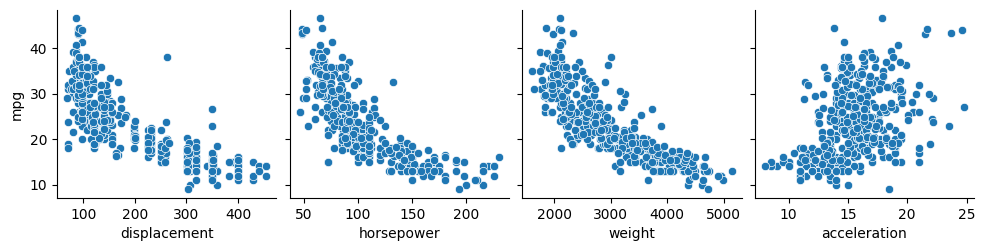

In [210]:
sns.pairplot(car_data,x_vars=['displacement','horsepower','weight','acceleration'],y_vars=['mpg'])

<AxesSubplot: xlabel='displacement', ylabel='mpg'>

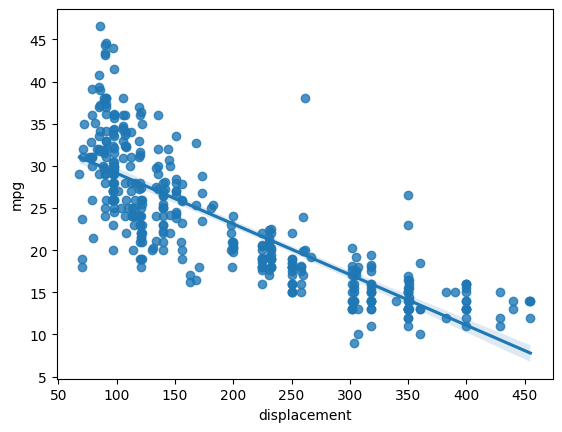

In [211]:
sns.regplot(x='displacement',y='mpg',data=car_data)

<AxesSubplot: >

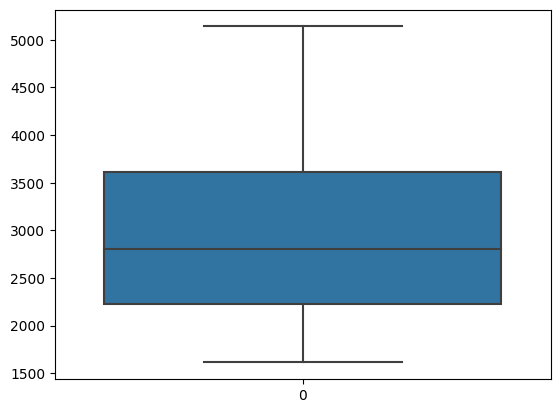

In [212]:
sns.boxplot(car_data['weight'])

<AxesSubplot: >

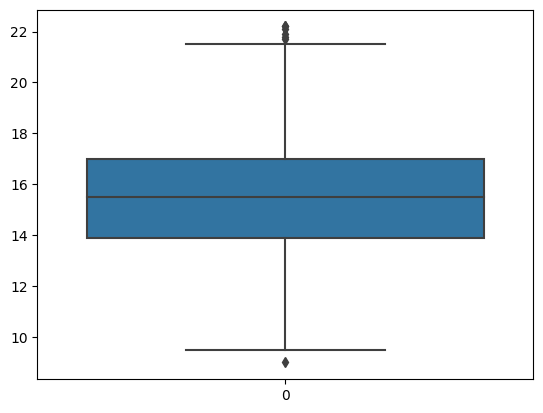

In [273]:
sns.boxplot(car_data['acceleration'])

In [270]:
car_data[car_data['acceleration']>25]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_lable


In [271]:
car_data[car_data['acceleration']>22.5 ] = car_data['acceleration'].mean()

In [272]:
car_data[car_data['acceleration']<9 ] = car_data['acceleration'].mean()

# Define Target Variable (y) and Feature Variables (X)

In [213]:
car_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [214]:
y=car_data['mpg']

In [215]:
y.shape

(392,)

In [216]:
from sklearn.preprocessing import LabelEncoder
l1 = LabelEncoder()
label = l1.fit_transform(car_data['origin'])
label

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 0, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       0, 0, 0, 1, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 2,
       2, 2, 2, 0, 1, 1, 2, 0, 2, 0, 1, 0, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 1, 0, 1,
       0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 2, 2, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2,

In [217]:
car_data['origin_lable']=label
car_data


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,origin_lable
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,2
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,2
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,2
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,2
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,2
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,2
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,2


In [218]:
x=car_data.drop(['mpg','origin','name'],axis=1)#[['displacement','horsepower','weight','acceleration','cylinders','model_year','origin_label']]
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_lable
0,8,307.0,130.0,3504,12.0,70,2
1,8,350.0,165.0,3693,11.5,70,2
2,8,318.0,150.0,3436,11.0,70,2
3,8,304.0,150.0,3433,12.0,70,2
4,8,302.0,140.0,3449,10.5,70,2
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,2
394,4,97.0,52.0,2130,24.6,82,0
395,4,135.0,84.0,2295,11.6,82,2
396,4,120.0,79.0,2625,18.6,82,2


In [219]:
x.shape

(392, 7)

In [220]:
x.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin_lable      int32
dtype: object

# Train Test Split

In [221]:
from sklearn.model_selection import train_test_split

In [222]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=2529)

In [223]:
len(x_train),len(x_test),len(car_data)

(274, 118, 392)

In [224]:
len(y_train),len(y_test),len(car_data)

(274, 118, 392)

In [225]:
len(car_data)

392

# Percentage allocation of data for Test and Train

In [226]:
train_data=(274/392)*100
print(train_data)

69.89795918367348


In [227]:
test_data=(118/392)*100
print(test_data)

30.102040816326532


# Scaling Data

In [228]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.fit_transform(x_test)

# Model selection 

In [274]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(x_train,y_train)
pred = linreg.predict(x_test)

In [275]:
from sklearn.metrics import r2_score
lr = r2_score(y_test, pred)*100
print(lr)

80.64254856943546


In [276]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(x_train,y_train)
pred1 = reg.predict(x_test)

In [277]:
dtr = r2_score(y_test, pred1)*100
print(dtr)

78.97211538448938


In [278]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50)
rf.fit(x_train,y_train)
pred2 = rf.predict(x_test)

In [279]:
rfr = r2_score(y_test, pred2)*100
print(rfr)

85.3177449356715


In [280]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train,y_train)
pred3 = knn.predict(x_test)

In [281]:
knr = r2_score(y_test,pred3)*100
print(knr)

68.8761332068271


In [282]:
from sklearn.linear_model import Lasso
lrg = Lasso()
lrg.fit(x_train, y_train)
pred4 = lrg.predict(x_test)

In [283]:
lgr = r2_score(y_test, pred4)*100 
print(lgr)

80.22852595069774


In [284]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(x_train,  y_train)
pred5 = rid.predict(x_test)

In [285]:
ridr = r2_score(y_test, pred5)*100
print(ridr)

80.6551900161471


In [286]:
print("Linear Regression : ", lr)
print("Desicion Tree : ", dtr)
print("Random Forest Regressor : ", rfr)
print("KNN Regressor : ", knr)
print("Lasso Linear Model : ", lgr)
print("Ridge Linear Model : ", ridr)

Linear Regression :  80.64254856943546
Desicion Tree :  78.97211538448938
Random Forest Regressor :  85.3177449356715
KNN Regressor :  68.8761332068271
Lasso Linear Model :  80.22852595069774
Ridge Linear Model :  80.6551900161471


In [287]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin_lable
0,8,307.0,130.0,3504,12.0,70,2
1,8,350.0,165.0,3693,11.5,70,2
2,8,318.0,150.0,3436,11.0,70,2
3,8,304.0,150.0,3433,12.0,70,2
4,8,302.0,140.0,3449,10.5,70,2
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,2
394,4,97.0,52.0,2130,24.6,82,0
395,4,135.0,84.0,2295,11.6,82,2
396,4,120.0,79.0,2625,18.6,82,2


In [288]:
x.isnull().sum()

cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin_lable    0
dtype: int64

In [289]:
y.isnull().sum()

0

In [290]:
car_data.name

0      chevrolet chevelle malibu
1              buick skylark 320
2             plymouth satellite
3                  amc rebel sst
4                    ford torino
                 ...            
393              ford mustang gl
394                    15.541327
395                dodge rampage
396                  ford ranger
397                   chevy s-10
Name: name, Length: 392, dtype: object

In [291]:
x.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model_year        int64
origin_lable      int32
dtype: object

In [292]:
car_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name', 'origin_lable'],
      dtype='object')

In [293]:
car_data[['origin', 'name', 'origin_lable']].head(50)

,origin,name,origin_lable
0,usa,chevrolet chevelle malibu,2.000000
1,usa,buick skylark 320,2.000000
2,usa,plymouth satellite,2.000000
3,usa,amc rebel sst,2.000000
4,usa,ford torino,2.000000
5,usa,ford galaxie 500,2.000000
6,usa,chevrolet impala,2.000000
7,15.453483,15.453483,15.453483
8,usa,pontiac catalina,2.000000
9,15.453483,15.453483,15.453483


In [ ]:
Name=input("Enter the car name:")
CAR=car_data[car_data['name']==Name]
print(CAR)

#print("The displacementof the car is :",CAR['displacement'].to_numpy())
#print("The Horsepower the car is :",CAR['horsepower'].to_numpy())
#print("The weight of the car is:",CAR['weight'].to_numpy())
#print("The acceleration of the car is :",CAR['acceleration'].to_numpy())
cylinder=int(input("Enter the no of cylinders:"))
displacement=input("Enter the displacement:")
horsepower=int(input("Enter the Horsepower:"))
weight=int(input("Enter the weight of the car:"))
acceleration=input("Enter the acceleration:")
model_year=int(input("Enter the model year of the car:"))
origin_label=int(input("Enter the origin_label of the car:"))

'''print(CAR['cylinders'])
print(CAR['displacement'])
print(CAR['horsepower'])
print(CAR['weight'])
print(CAR['acceleration'])
print(CAR['model_year'])
print(CAR['origin_lable'])'''
Mielage = rf.predict([[cylinder,displacement,horsepower,weight,acceleration,model_year,origin_label]])
print(Mielage)


In [ ]:
print(CAR['displacement'].to_numpy())

In [ ]:
 def prediction():
        displacement1=print(CAR['displacement'].to_numpy())#int(input("Enter the displacement:"))
        horsepower1=print(CAR['horsepower'].to_numpy())#int(input("Enter the Horsepower:"))
        weight1=print(CAR['weight'].to_numpy())#int(input("Enter the weight of the car:"))
        acceleration1=print(CAR['acceleration'].to_numpy())#int(input("Enter the acceleration:"))
        Mielage = rf.predict([[displacement1,horsepower1,weight1,acceleration1]])
        print(Mielage)
prediction()

In [ ]:
def car(name):
    Name=input("Enter the car name:")
    CAR=car_data[car_data['name']==Name]
    print(CAR)
car(Name)

In [ ]:
(37.418/44)*100